In [8]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
product_df = pd.read_csv("Product Wise ARR Report - Sheet5 (1).csv").drop(['Subscription Product ARR (converted)'], axis=1)
product_df['Product Name'] = product_df['Product Name'].str.replace('Training Essentials ', 'Training Essentials', regex=False)
product_df

,Account Name,Product Name,Quantity,Offered Price (converted)
0,BoostUp.ai,Training Essentials,6,10.93
1,AltiSales,Training Essentials,8,6.48
2,Paytronix,Training Essentials,8,5.01
3,APS Payroll,Training Essentials,10,6.00
4,ActZero,Training Essentials,10,15.83
...,...,...,...,...
1070,NuVasive,Virtual Role-Play (Missions + Quick Update),150,14.49
1071,Mendix EMEA,Virtual Role-Play (Missions + Quick Update),210,8.70
1072,Amplitude,Virtual Role-Play (Missions + Quick Update),475,3.99
1073,Alcon,Virtual Role-Play (Missions + Quick Update),1500,7.07


In [4]:
product_df = product_df.groupby(['Account Name', 'Product Name']).apply(lambda x: pd.Series({'Total Quantity': x['Quantity'].sum(),
    'Weighted Average Price': (x['Quantity'] * x['Offered Price (converted)']).sum() / x['Quantity'].sum() }))

product_df = product_df.reset_index()
product_df = product_df.drop(['Account Name'], axis=1)
product_df

,Product Name,Total Quantity,Weighted Average Price
0,Asset Hub,55.0,10.000000
1,Call AI,121.0,34.549587
2,Coaching,66.0,10.000000
3,Digital Sales Rooms,51.0,8.000000
4,Call AI,6.0,65.970000
...,...,...,...
780,Essentials Package,30.0,4.840000
781,Premier Package + Spaced Reinforcements,26.0,32.940000
782,Spaced Reinforcements,30.0,3.630000
783,Coaching,500.0,0.490000


In [4]:
product_df.groupby(['Product Name']).size().reset_index(name="count")

,Product Name,count
0,Asset Hub,98
1,Call AI,59
2,Coaching,81
3,Digital Sales Rooms,55
4,Essentials Package,19
5,Practice & Reinforcement,118
6,Premier Package,22
7,Premier Package + Spaced Reinforcements,90
8,Professional Package,11
9,Professional Package + Spaced Reinforcements,23


In [46]:
# x = product_df[product_df['Product Name'] == "Premier Package"]['Total Quantity']
# y = product_df[product_df['Product Name'] == "Premier Package"]['Weighted Average Price']

# m, b = np.polyfit(x, y, 1)

# k = b
# y_reflected = 2*k - y

# plt.scatter(x, y, label='Original')
# # plt.scatter(x, y_reflected, label='Reflected', color='green')
# plt.plot(x, m*x + b, color='red', label='Original Line of Best Fit')

# m_reflected, b_reflected = np.polyfit(x, y_reflected, 1)
# plt.plot(x, m_reflected*x + b_reflected, color='blue', label='Reflected Line of Best Fit')
# plt.axhline(y=k, color='purple', linestyle='--', label='Reflection Line y = 20.5')

# plt.xlabel('Total Quantity')
# plt.ylabel('Weighted Average Price')
# plt.title('Original and Reflected Plots with Correlation Lines')
# plt.legend()
# plt.grid(True)
# plt.show()

# Coefficent of correlation

In [12]:
# for name, group in product_df.groupby('Product Name'):
#     correlation = group['Total Quantity'].corr(group['Weighted Average Price'])
#     print(f"Product Name: {name}, --------------------> Pearson Correlation Coefficient: {correlation:.3f}")

# Polynomial Regularisation

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from scipy.stats import uniform, randint
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler
import os

# L2 - Ridge Regularization

### Hyperparameter tuning considering the number of variables as well

# Generalized Code

In [14]:
import os
os.makedirs('Polynomial_images', exist_ok=True)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import uniform, expon

In [19]:
polynomial_degree_df = pd.DataFrame()
for grouped_value, grouped_df in product_df.groupby(['Product Name']):

    # Handling outliers for 'Total Quantity'
    Q1_quantity = grouped_df['Total Quantity'].quantile(0.25)
    Q3_quantity = grouped_df['Total Quantity'].quantile(0.90)
    IQR_quantity = Q3_quantity - Q1_quantity
    lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
    upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity
    grouped_df['Total Quantity'] = np.where(grouped_df['Total Quantity'] < lower_bound_quantity, lower_bound_quantity, grouped_df['Total Quantity'])
    grouped_df['Total Quantity'] = np.where(grouped_df['Total Quantity'] > upper_bound_quantity, upper_bound_quantity, grouped_df['Total Quantity'])

    # Handling outliers for 'Weighted Average Price'
    Q1_price = grouped_df['Weighted Average Price'].quantile(0.25)
    Q3_price = grouped_df['Weighted Average Price'].quantile(0.75)
    IQR_price = Q3_price - Q1_price
    lower_bound_price = Q1_price - 1.5 * IQR_price
    upper_bound_price = Q3_price + 1.5 * IQR_price
    grouped_df['Weighted Average Price'] = np.where(grouped_df['Weighted Average Price'] < lower_bound_price, lower_bound_price, grouped_df['Weighted Average Price'])
    grouped_df['Weighted Average Price'] = np.where(grouped_df['Weighted Average Price'] > upper_bound_price, upper_bound_price, grouped_df['Weighted Average Price']) 

    X = grouped_df['Total Quantity'].values.reshape(-1, 1)
    y = grouped_df['Weighted Average Price']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

    # Calculate the mean and standard deviation of X_train
    mean_quantity = X_train.mean()
    std_dev_quantity = X_train.std()

    # Initialize beta and calculate initial correlation
    beta = 3
    correlation = np.corrcoef(X_train.reshape(-1), y_train)[0, 1]
    print("Initial Correlation = ", correlation)

    while correlation > 0:
        # Define the 3 sigma range for X_train
        lower_limit = mean_quantity - 3 * std_dev_quantity
        upper_limit = mean_quantity + beta * std_dev_quantity

        # Create a one-dimensional mask for filtering X_train and y_train
        mask = ((X_train.reshape(-1) >= lower_limit) & (X_train.reshape(-1) <= upper_limit))
        
        filtered_X_train = X_train[mask].reshape(-1, 1)  # Reshape back to 2D for model compatibility
        filtered_y_train = y_train[mask]

        # Check if filtered data has enough data points
        if len(filtered_X_train) <= 2:
            print("Not enough data points left to calculate a reliable correlation.")
            break

        # Recalculate the correlation
        correlation = np.corrcoef(filtered_X_train.reshape(-1), filtered_y_train)[0, 1]

        if correlation > 0:
            beta -= 0.1

        if beta <= 0:
            print("Unable to achieve negative correlation within reasonable beta range.")
            break 

    print("Final Beta = ", beta, "Final Correlation = ", correlation)
    
    # Use filtered data for training if beta has changed
    if beta != 3:
        X_train = filtered_X_train
        y_train = filtered_y_train

    # Polynomial regression analysis
    for degree in range(1, 3):
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)

        # Ridge Regression model setup
        ridge_model = Ridge(random_state=0)

        # Parameter distribution for alpha
        param_dist = {
            'alpha': uniform(0.000001, 2000000)
        }

        # RandomizedSearchCV for hyperparameter tuning
        random_search = RandomizedSearchCV(ridge_model, param_distributions=param_dist, n_iter=150, cv=6, random_state=20)
        random_search.fit(X_train_poly, y_train)

        # Training the model with best parameters
        best_model = random_search.best_estimator_
        best_model.fit(X_train_poly, y_train)

        # Prediction and evaluation
        y_pred = best_model.predict(X_test_poly)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        n = len(y_test)
        p = degree
        adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

        print(f'Degree {degree} - MSE: {mse}, R²: {r2}, Adjusted R²: {adjusted_r2}, Best Alpha: {random_search.best_params_["alpha"]}')

        # Plotting
        plt.scatter(X_train, y_train, color='green', label='Training Data')
        plt.scatter(X_test, y_test, color='red', label='Testing Data')
        plt.scatter(X_test, y_pred, color='blue', label='Predicted Values')
        plt.xlabel('Total Quantity')
        plt.ylabel('Weighted Average Price')
        plt.title(f'Ridge Regression Degree {degree}')    
        plt.legend()
        plot_file_path = f'Polynomial_images/{grouped_value}_plot_degree_{degree}.png'
        plt.savefig(plot_file_path)    
        plt.close()

        # Polynomial equation construction
        coefficients = best_model.coef_
        intercept = best_model.intercept_
        polynomial_terms = [f"{coeff:.3f} * X^{i}" for i, coeff in enumerate(coefficients) if coeff != 0]
        polynomial_equation = " + ".join(polynomial_terms)
        polynomial_equation = f"y = {intercept:.3f} + " + polynomial_equation

        print("Polynomial Regression Equation:")
        print(polynomial_equation)

        # Dataframe append
        df = pd.DataFrame({
            "Product Name":[grouped_value],
            "Degree": [degree],
            "Mean Squared Error": [mse],
            "R² Score": [r2],
            "Adjusted R² Score": [adjusted_r2],
            "Best Alpha": [random_search.best_params_["alpha"]],
            "Polynomial Equation": [polynomial_equation],
            "coefficients" : [coefficients],
            "intercept" : [intercept],
            "Plot Image Path": [plot_file_path]
        })

        polynomial_degree_df = pd.concat([polynomial_degree_df, df], ignore_index=True)

/var/folders/wg/6bmfq7n96_x9z0rl_8sln1pr0000gn/T/ipykernel_3291/1036333278.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for grouped_value, grouped_df in product_df.groupby(['Product Name']):


Initial Correlation =  -0.5295708528356464
Final Beta =  3 Final Correlation =  -0.5295708528356464
Degree 1 - MSE: 39.07250853055032, R²: -0.24770065888015425, Adjusted R²: -0.31701736215127396, Best Alpha: 1993201.7091078158
Polynomial Regression Equation:
y = 14.366 + -0.004 * X^1
Degree 2 - MSE: 43.334296045595224, R²: -0.3837921280616403, Adjusted R²: -0.5465912019512451, Best Alpha: 169276.60960224547
Polynomial Regression Equation:
y = 15.000 + -0.008 * X^1 + 0.000 * X^2
Initial Correlation =  -0.1422909335600764
Final Beta =  3 Final Correlation =  -0.1422909335600764
Degree 1 - MSE: 265.8149728724508, R²: -0.05831879953952135, Adjusted R²: -0.1641506794934735, Best Alpha: 1889140.975841736
Polynomial Regression Equation:
y = 43.856 + -0.005 * X^1
Degree 2 - MSE: 261.10174561892495, R²: -0.03955350217870657, Adjusted R²: -0.2705653915517525, Best Alpha: 849088.9527274456
Polynomial Regression Equation:
y = 44.260 + -0.005 * X^1 + -0.000 * X^2
Initial Correlation =  -0.459905051

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-d

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-d

Degree 1 - MSE: 0.21308824509549296, R²: -1.8608315737521726, Adjusted R²: -4.721663147504345, Best Alpha: 1176261.6021555485
Polynomial Regression Equation:
y = 16.988 + -0.000 * X^1


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-d

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-d

Degree 2 - MSE: 0.22290846026637864, R²: -1.9926735794400972, Adjusted R²: -inf, Best Alpha: 1176261.6021555485
Polynomial Regression Equation:
y = 17.003 + -0.000 * X^1 + -0.000 * X^2
Initial Correlation =  -0.44673527662110174
Final Beta =  3 Final Correlation =  -0.44673527662110174
Degree 1 - MSE: 94.5110167666885, R²: 0.30652329250504584, Adjusted R²: 0.07536439000672779, Best Alpha: 1993201.7091078158
Polynomial Regression Equation:
y = 25.075 + -0.005 * X^1
Degree 2 - MSE: 39.77927531389013, R²: 0.7081186742566625, Adjusted R²: 0.41623734851332506, Best Alpha: 169276.60960224547
Polynomial Regression Equation:
y = 29.819 + -0.028 * X^1 + 0.000 * X^2
Initial Correlation =  -0.4897677549099253
Final Beta =  3 Final Correlation =  -0.4897677549099253
Degree 1 - MSE: 0.9267238524412236, R²: -0.10161648571302329, Adjusted R²: -0.4688219809506977, Best Alpha: 1993201.7091078158
Polynomial Regression Equation:
y = 2.969 + -0.000 * X^1
Degree 2 - MSE: 0.6254365537329685, R²: 0.256530177

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-d

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-d

Degree 1 - MSE: 33.89270355076545, R²: -0.9305371666124844, Adjusted R²: -inf, Best Alpha: 1176261.6021555485
Polynomial Regression Equation:
y = 5.958 + -0.001 * X^1


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-d

Degree 2 - MSE: 32.19577947259749, R²: -0.8338799319095633, Adjusted R²: 2.8338799319095633, Best Alpha: 1176261.6021555485
Polynomial Regression Equation:
y = 5.985 + 0.000 * X^1 + -0.000 * X^2


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-d

In [20]:
polynomial_degree_df

,Product Name,Degree,Mean Squared Error,R² Score,Adjusted R² Score,Best Alpha,Polynomial Equation,coefficients,intercept,Plot Image Path
0,Asset Hub,1,39.072509,-0.247701,-0.317017,1.993202e+06,y = 14.366 + -0.004 * X^1,"[0.0, -0.004018456122386522]",14.365711,Polynomial_images/Asset Hub_plot_degree_1.png
1,Asset Hub,2,43.334296,-0.383792,-0.546591,1.692766e+05,y = 15.000 + -0.008 * X^1 + 0.000 * X^2,"[0.0, -0.0077408355705104, 1.161476727424503e-06]",14.999649,Polynomial_images/Asset Hub_plot_degree_2.png
2,Call AI,1,265.814973,-0.058319,-0.164151,1.889141e+06,y = 43.856 + -0.005 * X^1,"[0.0, -0.005299077229671729]",43.855571,Polynomial_images/Call AI_plot_degree_1.png
3,Call AI,2,261.101746,-0.039554,-0.270565,8.490890e+05,y = 44.260 + -0.005 * X^1 + -0.000 * X^2,"[0.0, -0.004574494928375536, -1.95931050644594...",44.259845,Polynomial_images/Call AI_plot_degree_2.png
4,Coaching,1,13.033824,-0.265173,-0.349517,1.123374e+06,y = 6.540 + -0.001 * X^1,"[0.0, -0.0011055867324907048]",6.540004,Polynomial_images/Coaching_plot_degree_1.png
5,Coaching,2,11.557925,-0.121909,-0.282182,1.993202e+06,y = 6.796 + -0.002 * X^1 + 0.000 * X^2,"[0.0, -0.001915624885333012, 1.563400947136445...",6.795904,Polynomial_images/Coaching_plot_degree_2.png
6,Digital Sales Rooms,1,6.899618,0.454405,0.393783,8.561570e+05,y = 10.141 + -0.005 * X^1,"[0.0, -0.004738882186979647]",10.140560,Polynomial_images/Digital Sales Rooms_plot_deg...
7,Digital Sales Rooms,2,6.448747,0.490058,0.362573,2.110045e+05,y = 10.364 + -0.007 * X^1 + 0.000 * X^2,"[0.0, -0.006870843541844034, 9.961378956999264...",10.363508,Polynomial_images/Digital Sales Rooms_plot_deg...
8,Essentials Package,1,2.196254,-0.205342,-0.808013,1.993202e+06,y = 3.767 + -0.000 * X^1,"[0.0, -0.0002548160871162302]",3.767179,Polynomial_images/Essentials Package_plot_degr...
9,Essentials Package,2,1.776249,0.025164,-1.924508,9.631474e+04,y = 3.961 + -0.002 * X^1 + 0.000 * X^2,"[0.0, -0.0015207238418339156, 1.66218865695980...",3.960506,Polynomial_images/Essentials Package_plot_degr...


In [24]:
# Grouping by 'Product Name' and finding the index of minimum 'Mean Squared Error' for each group
idx = polynomial_degree_df.groupby('Product Name')['Adjusted R² Score'].idxmax()
best_models_df = polynomial_degree_df.loc[idx]
best_models_df.reset_index(drop=True, inplace=True)
best_models_df

,Product Name,Degree,Mean Squared Error,R² Score,Adjusted R² Score,Best Alpha,Polynomial Equation,coefficients,intercept,Plot Image Path
0,Asset Hub,1,39.072509,-0.247701,-0.317017,1.993202e+06,y = 14.366 + -0.004 * X^1,"[0.0, -0.004018456122386522]",14.365711,Polynomial_images/Asset Hub_plot_degree_1.png
1,Call AI,1,265.814973,-0.058319,-0.164151,1.889141e+06,y = 43.856 + -0.005 * X^1,"[0.0, -0.005299077229671729]",43.855571,Polynomial_images/Call AI_plot_degree_1.png
2,Coaching,2,11.557925,-0.121909,-0.282182,1.993202e+06,y = 6.796 + -0.002 * X^1 + 0.000 * X^2,"[0.0, -0.001915624885333012, 1.563400947136445...",6.795904,Polynomial_images/Coaching_plot_degree_2.png
3,Digital Sales Rooms,1,6.899618,0.454405,0.393783,8.561570e+05,y = 10.141 + -0.005 * X^1,"[0.0, -0.004738882186979647]",10.140560,Polynomial_images/Digital Sales Rooms_plot_deg...
4,Essentials Package,1,2.196254,-0.205342,-0.808013,1.993202e+06,y = 3.767 + -0.000 * X^1,"[0.0, -0.0002548160871162302]",3.767179,Polynomial_images/Essentials Package_plot_degr...
5,Practice & Reinforcement,1,12.344701,-0.058243,-0.106345,1.993202e+06,y = 8.518 + -0.001 * X^1,"[0.0, -0.0013850425498151127]",8.517983,Polynomial_images/Practice & Reinforcement_plo...
6,Premier Package,1,45.045463,-0.645827,-1.194436,1.555030e+04,y = 20.657 + -0.012 * X^1,"[0.0, -0.011885576661467123]",20.656624,Polynomial_images/Premier Package_plot_degree_...
7,Premier Package + Spaced Reinforcements,1,140.804714,0.016979,-0.044460,1.993202e+06,y = 22.280 + -0.005 * X^1,"[0.0, -0.004526654843849585]",22.280128,Polynomial_images/Premier Package + Spaced Rei...
8,Professional Package,1,0.213088,-1.860832,-4.721663,1.176262e+06,y = 16.988 + -0.000 * X^1,"[0.0, -2.9301130036366087e-05]",16.987792,Polynomial_images/Professional Package_plot_de...
9,Professional Package + Spaced Reinforcements,2,39.779275,0.708119,0.416237,1.692766e+05,y = 29.819 + -0.028 * X^1 + 0.000 * X^2,"[0.0, -0.02848625319364813, 7.82643403015154e-06]",29.818510,Polynomial_images/Professional Package + Space...


In [40]:
def predict_price_using_coefficients(best_models_df, product_name, total_quantity):
    choose_model = best_models_df[best_models_df['Product Name'] == product_name]
    predicted_price = choose_model['intercept'].iloc[0]
    
    for degree, coefficient in enumerate(choose_model['coefficients'].iloc[0]):
        predicted_price += coefficient * (total_quantity ** degree)

    return(predicted_price)

product_name = 'Premier Package'
total_quantity = 1500
predicted_price = predict_price_using_coefficients(best_models_df, product_name, total_quantity)
print(f"Predicted Price: {predicted_price}")

Predicted Price: 2.828259347524625


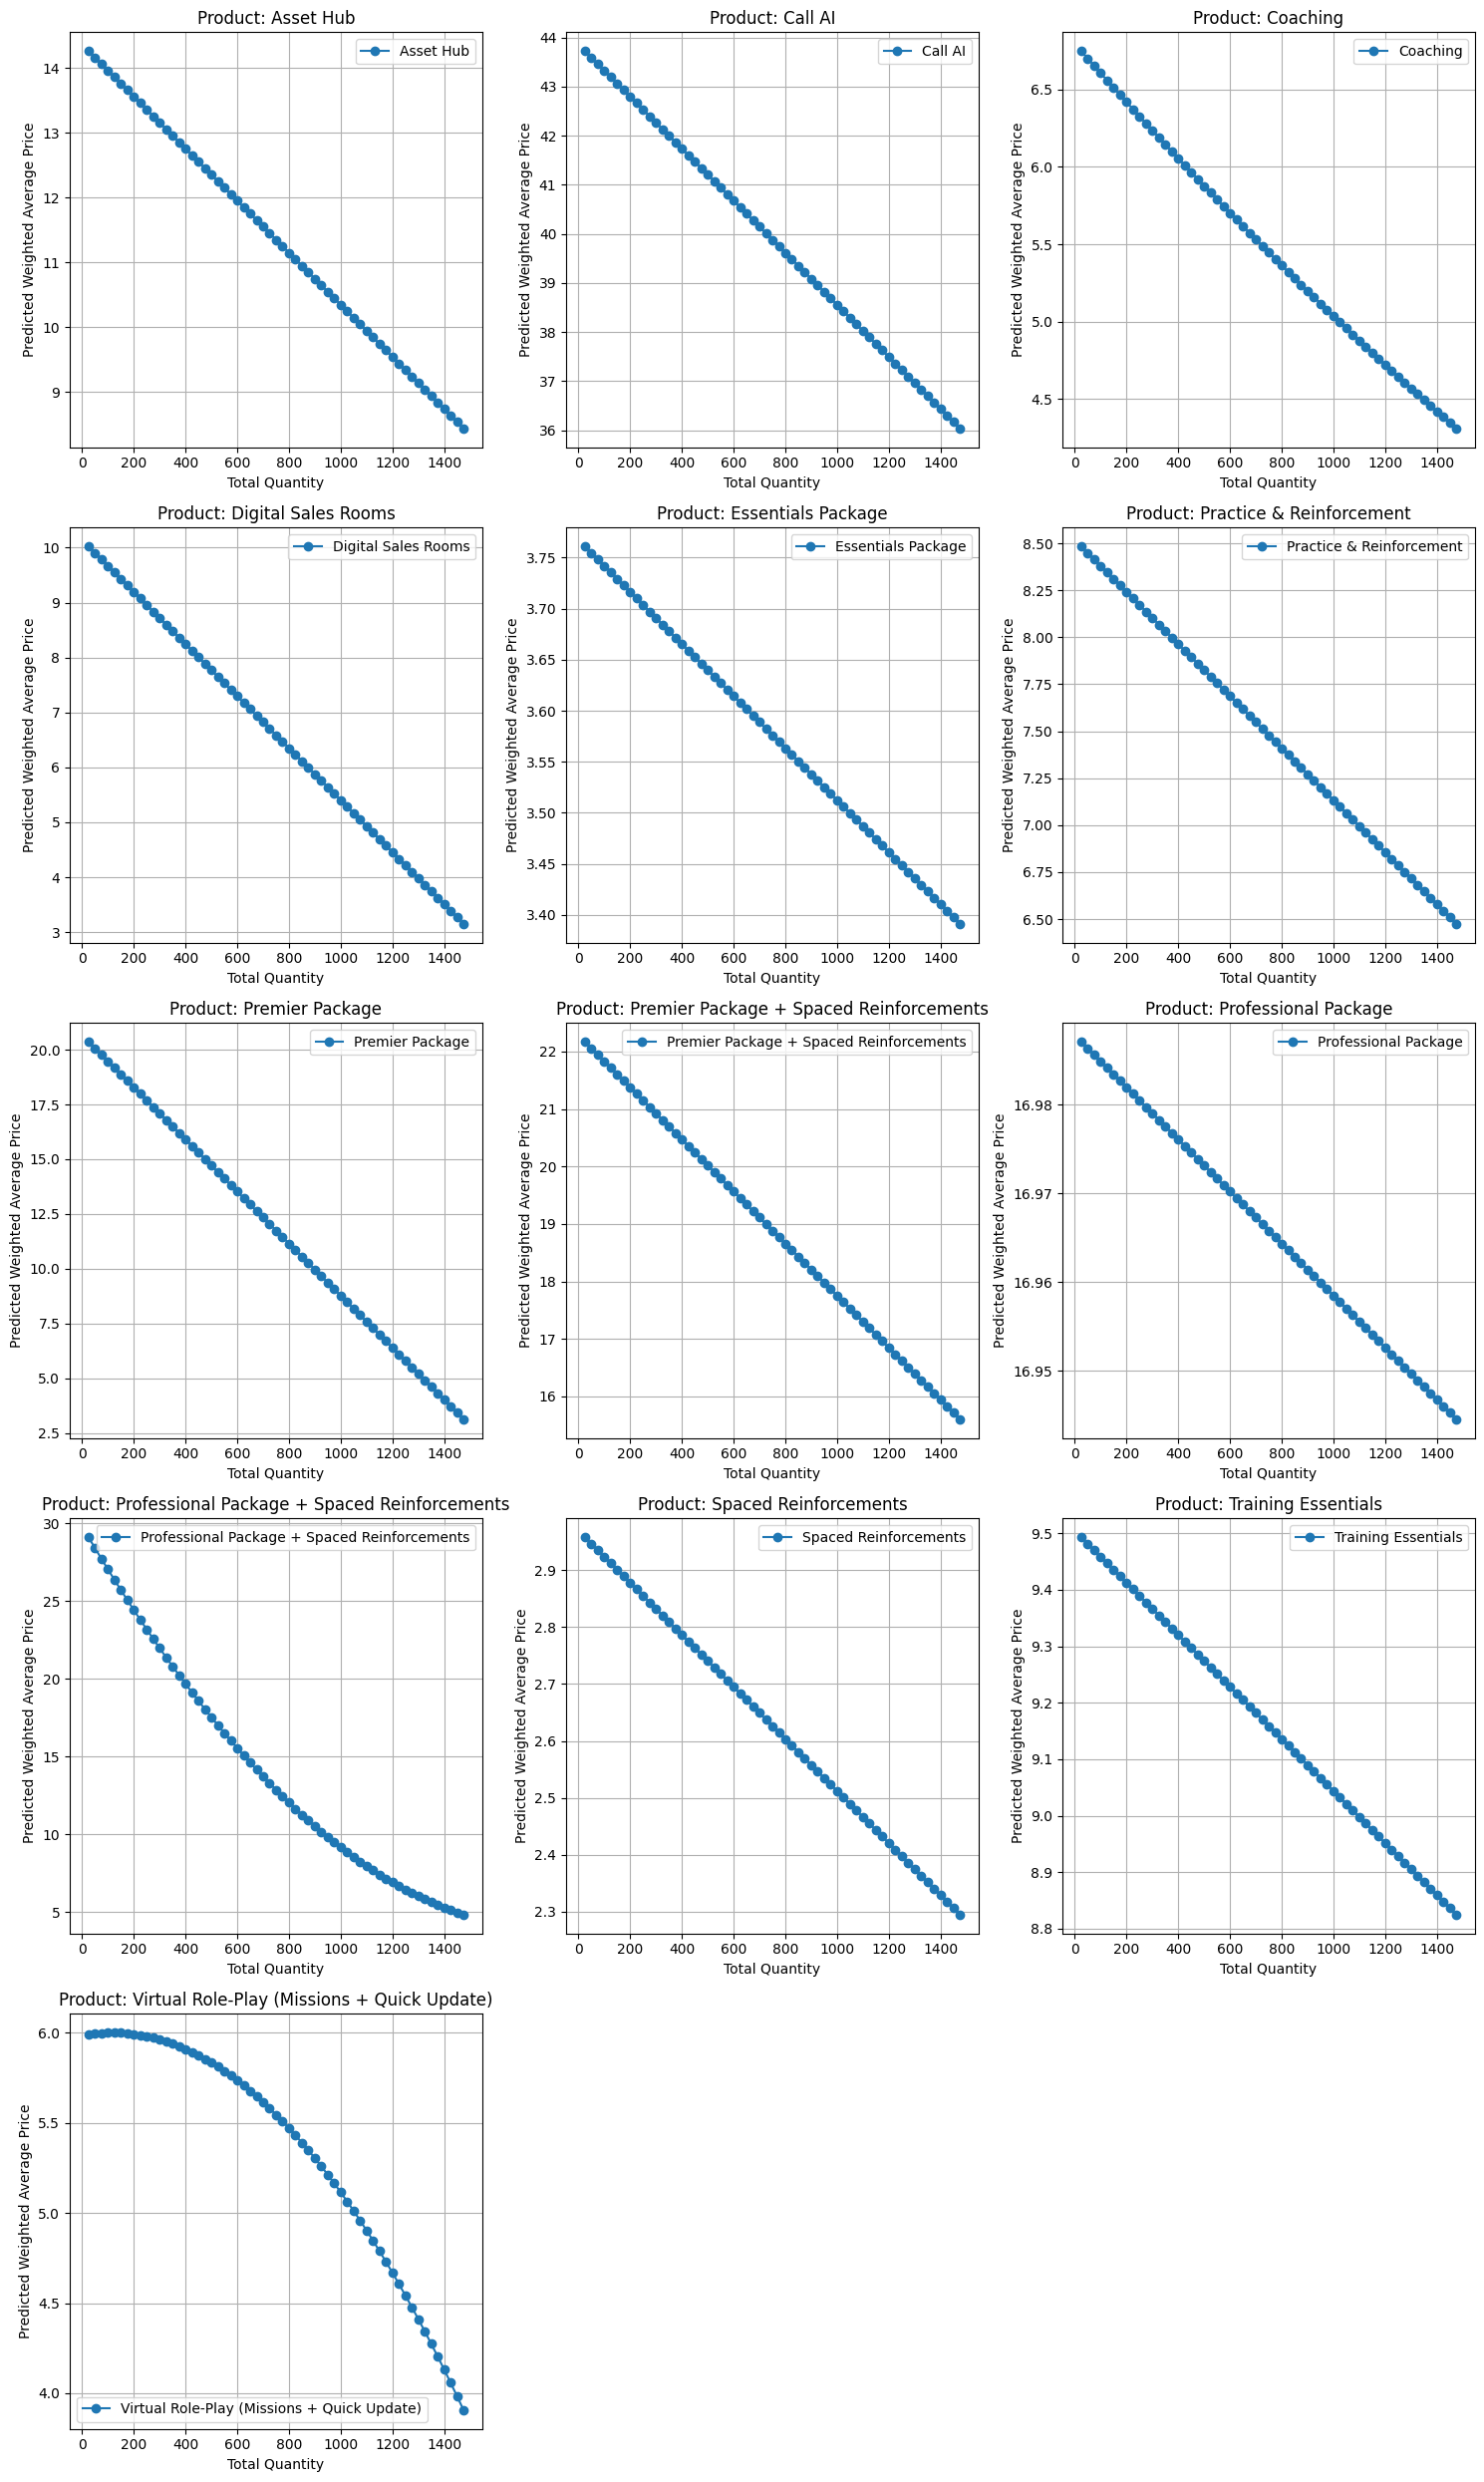

In [26]:
#### ALL IN DIFFERENT SUBPLOTS

total_quantities = range(25, 1500, 25)
num_products = len(best_models_df['Product Name'].unique())
num_rows = (num_products + 2) // 3 

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 5))
axes = axes.flatten() 

for idx, product_name in enumerate(best_models_df['Product Name'].unique()):
    predicted_prices = [predict_price_using_coefficients(best_models_df, product_name, qty) for qty in total_quantities]
    axes[idx].plot(total_quantities, predicted_prices, marker='o', label=product_name)
    axes[idx].set_xlabel('Total Quantity')
    axes[idx].set_ylabel('Predicted Weighted Average Price')
    axes[idx].set_title(f'Product: {product_name}')
    axes[idx].legend()
    axes[idx].grid(True)

for ax in axes[num_products:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

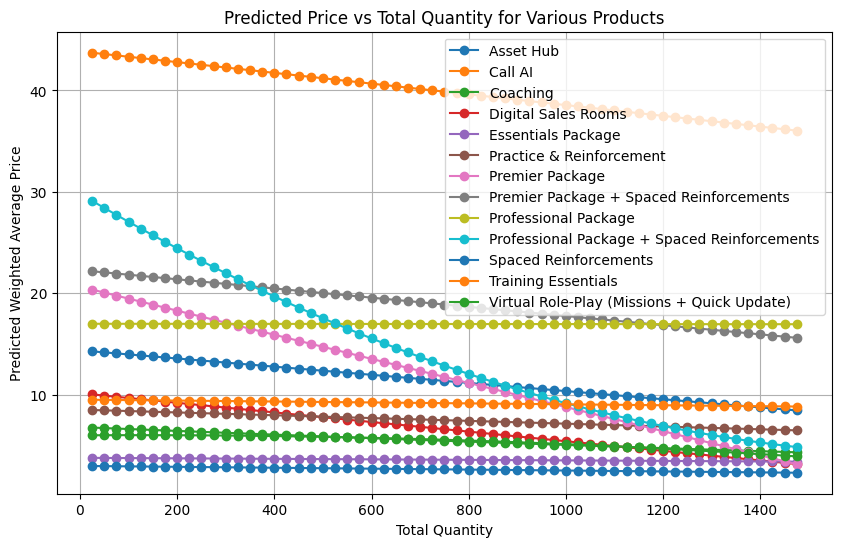

In [27]:
#### ALL IN THE SAME PLOT
total_quantities = range(25, 1500, 25)
plt.figure(figsize=(10, 6))
for product_name in best_models_df['Product Name'].unique():
    predicted_prices = [predict_price_using_coefficients(best_models_df, product_name, qty) for qty in total_quantities]
    plt.plot(total_quantities, predicted_prices, marker='o', label=product_name)

plt.xlabel('Total Quantity')
plt.ylabel('Predicted Weighted Average Price')
plt.title('Predicted Price vs Total Quantity for Various Products')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# ##### SINGLE PLOT
# total_quantities = range(25, 1000, 25) 
# predicted_prices = [predict_price_using_coefficients(best_models_df, 'Virtual Role-Play (Missions + Quick Update)', qty) for qty in total_quantities]

# plt.figure(figsize=(10, 6))
# plt.plot(total_quantities, predicted_prices, marker='o')
# plt.xlabel('Total Quantity')
# plt.ylabel('Predicted Weighted Average Price')
# plt.title('Predicted Price vs Total Quantity for Training Essentials')
# plt.grid(True)
# plt.show()

# Save the trained Models

In [45]:
# import os
# import joblib
# from sklearn.linear_model import Ridge
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.pipeline import make_pipeline

# os.makedirs('Models', exist_ok=True)

In [44]:
# for index, row in best_models_df.iterrows():
#     product_name = row['Product Name']
#     degree = row['Degree']
#     alpha = row['Best Alpha']
#     grouped_df = product_df[product_df['Product Name'] == product_name]

#     X = grouped_df['Total Quantity'].values.reshape(-1, 1)
#     y = grouped_df['Weighted Average Price']

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#     model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=degree), Ridge(alpha=alpha, random_state=0))
#     model.fit(X_train, y_train)

#     # Save the model
#     filename = f'Models/model_{product_name}_degree_{degree}_alpha_{alpha:.4f}.joblib'
#     joblib.dump(model, filename)

# Prediction Using the model

In [43]:
# import os
# import joblib

# def predict_price(product_name, total_quantity):
#     models_dir = 'Models'

#     model_file = None
#     for file in os.listdir(models_dir):
#         if product_name in file:
#             model_file = file
#             break

#     if model_file is None:
#         return f"No model found for product: {product_name}"

#     # Load the model
#     model_path = os.path.join(models_dir, model_file)
#     model = joblib.load(model_path)

#     # Make a prediction
#     predicted_price = model.predict([[total_quantity]])

#     return predicted_price[0]

In [42]:
# product_name = 'Premier Package'
# total_quantity = 10
# predicted_price = predict_price_using_coefficients(best_models_df, product_name, total_quantity)
# print(f"Predicted Price: {predicted_price}")